<a href="https://www.kaggle.com/code/onursercanyilmaz/2-recommended-reads-conversion-of-data-to-num?scriptVersionId=127920809" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![Logo](https://raw.githubusercontent.com/onursercanyilmaz/recommendedreads/main/images/recommendedreads_rectangle.png?token=GHSAT0AAAAAAB75L5AIJN35ELPMSG6AVDKSZBUBW7Q)

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import collections
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
from collections import Counter
import string
import re
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
import torch
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel

/kaggle/input/1-recommended-reads-stemming-and-lemmazation/stemmedandlemmatizeddata.csv
/kaggle/input/1-recommended-reads-stemming-and-lemmazation/__results__.html
/kaggle/input/1-recommended-reads-stemming-and-lemmazation/__resultx__.html
/kaggle/input/1-recommended-reads-stemming-and-lemmazation/__notebook__.ipynb
/kaggle/input/1-recommended-reads-stemming-and-lemmazation/__output__.json
/kaggle/input/1-recommended-reads-stemming-and-lemmazation/custom.css
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('../input/1-recommended-reads-stemming-and-lemmazation/stemmedandlemmatizeddata.csv')
df

,booktitle,originalbooktitle,authorname,editionlanguage,ratingscore,ratingvotes,reviewnumber,bookdescription,yearpublished,genres,url,type,untokenizeddata,tokenizeddata
0,Obsidian,Obsidian,Jennifer L. Armentrout,English,4.17,236780,18161,Starting over sucks.When we moved to West Virg...,2011,"{'Young Adult': 3439, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/12578077-o...,aliens,Obsidian Jennifer L. Armentrout Starting over ...,"['obsidian', 'jennif', 'l', 'armentrout', 'sta..."
1,Onyx,Onyx,Jennifer L. Armentrout,English,4.27,153429,10497,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,2012,"{'Young Adult': 2271, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/13047090-onyx,aliens,Onyx Jennifer L. Armentrout BEING CONNECTED TO...,"['onyx', 'jennif', 'l', 'armentrout', 'connect..."
2,The 5th Wave,The 5th Wave,Rick Yancey,English,4.03,400600,29990,"After the 1st wave, only darkness remains. Aft...",2013,"{'Young Adult': 5436, 'Science Fiction': 3327,...",https://www.goodreads.com/book/show/16101128-t...,aliens,"The 5th Wave Rick Yancey After the 1st wave, o...","['th', 'wave', 'rick', 'yancey', 'st', 'wave',..."
3,The Host,The Host,Stephenie Meyer,English,3.84,915026,41673,Melanie Stryder refuses to fade away. The eart...,2008,"{'Young Adult': 4529, 'Science Fiction': 4285,...",https://www.goodreads.com/book/show/1656001.Th...,aliens,The Host Stephenie Meyer Melanie Stryder refus...,"['host', 'stepheni', 'meyer', 'melani', 'stryd..."
4,Opal,Opal,Jennifer L. Armentrout,None,4.27,129006,9463,No one is like Daemon Black.When he set out to...,2012,"{'Young Adult': 1855, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/13362536-opal,aliens,Opal Jennifer L. Armentrout No one is like Dae...,"['opal', 'jennif', 'l', 'armentrout', 'one', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14898,Tumbling Through Time,Tumbling Through Time,Gwyn Cready,English,3.34,312,51,"In her sparkling and hilarious debut, author G...",2000,"{'Romance': 28, 'Science Fiction (Time Travel)...",https://www.goodreads.com/book/show/1888734.Tu...,time travel,Tumbling Through Time Gwyn Cready In her spark...,"['tumbl', 'time', 'gwyn', 'creadi', 'sparkl', ..."
14899,Time's Arrow,Time’s Arrow,Martin Amis,English,3.71,14934,1106,In Time's Arrow the doctor Tod T. Friendly die...,1991,"{'Fiction': 586, 'Historical (Historical Ficti...",https://www.goodreads.com/book/show/23031.Time...,time travel,Time's Arrow Martin Amis In Time's Arrow the d...,"['time', 'arrow', 'martin', 'ami', 'time', 'ar..."
14900,Time Out of Joint,Time Out of Joint,Philip K. Dick,English,3.85,11126,688,Time Out of Joint is Philip K. Dick’s classic ...,1959,"{'Science Fiction': 532, 'Fiction': 211, 'Nove...",https://www.goodreads.com/book/show/698034.Tim...,time travel,Time Out of Joint Philip K. Dick Time Out of J...,"['time', 'joint', 'philip', 'k', 'dick', 'time..."
14901,Fog Magic,Fog Magic,Julia L. Sauer,English,3.88,1204,170,"Originally published in 1943, this edition fea...",1943,"{'Fantasy': 73, 'Fiction': 31, 'Childrens': 31...",https://www.goodreads.com/book/show/297891.Fog...,time travel,Fog Magic Julia L. Sauer Originally published ...,"['fog', 'magic', 'julia', 'l', 'sauer', 'origi..."


In [3]:
df['tokenizeddata'] = df['tokenizeddata'].apply(lambda x: eval(x))

In [4]:
df['tokenizeddata'] = df['tokenizeddata'].apply(lambda x: list(set(x)))

# Zipf

In [5]:
def calculateZipf(tokens):
    freq = collections.Counter(tokens)

# Sort the tokens by frequency
    sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

    # Plot the frequency distribution on a log-log scale
    ranks = range(1, len(sorted_freq) + 1)
    frequencies = [f for _, f in sorted_freq]
    return ranks, frequencies

In [6]:
df['zipfrankfreq'] = df['untokenizeddata'].apply(lambda x: calculateZipf(x))
df

,booktitle,originalbooktitle,authorname,editionlanguage,ratingscore,ratingvotes,reviewnumber,bookdescription,yearpublished,genres,url,type,untokenizeddata,tokenizeddata,zipfrankfreq
0,Obsidian,Obsidian,Jennifer L. Armentrout,English,4.17,236780,18161,Starting over sucks.When we moved to West Virg...,2011,"{'Young Adult': 3439, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/12578077-o...,aliens,Obsidian Jennifer L. Armentrout Starting over ...,"[next, wave, stick, close, romanc, touch, gala...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."
1,Onyx,Onyx,Jennifer L. Armentrout,English,4.27,153429,10497,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,2012,"{'Young Adult': 2271, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/13047090-onyx,aliens,Onyx Jennifer L. Armentrout BEING CONNECTED TO...,"[new, come, stop, romanc, tell, even, go, get,...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."
2,The 5th Wave,The 5th Wave,Rick Yancey,English,4.03,400600,29990,"After the 1st wave, only darkness remains. Aft...",2013,"{'Young Adult': 5436, 'Science Fiction': 3327,...",https://www.goodreads.com/book/show/16101128-t...,aliens,"The 5th Wave Rick Yancey After the 1st wave, o...","[evan, life, death, wave, onenow, scatter, dar...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."
3,The Host,The Host,Stephenie Meyer,English,3.84,915026,41673,Melanie Stryder refuses to fade away. The eart...,2008,"{'Young Adult': 4529, 'Science Fiction': 4285,...",https://www.goodreads.com/book/show/1656001.Th...,aliens,The Host Stephenie Meyer Melanie Stryder refus...,"[never, former, fade, stryder, alien, dystopia...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."
4,Opal,Opal,Jennifer L. Armentrout,None,4.27,129006,9463,No one is like Daemon Black.When he set out to...,2012,"{'Young Adult': 1855, 'Fantasy (Paranormal) ':...",https://www.goodreads.com/book/show/13362536-opal,aliens,Opal Jennifer L. Armentrout No one is like Dae...,"[test, shatter, death, mean, strong, new, clos...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14898,Tumbling Through Time,Tumbling Through Time,Gwyn Cready,English,3.34,312,51,"In her sparkling and hilarious debut, author G...",2000,"{'Romance': 28, 'Science Fiction (Time Travel)...",https://www.goodreads.com/book/show/1888734.Tu...,time travel,Tumbling Through Time Gwyn Cready In her spark...,"[pink, irresist, romanc, heel, busi, trip, fra...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."
14899,Time's Arrow,Time’s Arrow,Martin Amis,English,3.71,14934,1106,In Time's Arrow the doctor Tod T. Friendly die...,1991,"{'Fiction': 586, 'Historical (Historical Ficti...",https://www.goodreads.com/book/show/23031.Time...,time travel,Time's Arrow Martin Amis In Time's Arrow the d...,"[prelud, home, life, war, british, histori, to...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."
14900,Time Out of Joint,Time Out of Joint,Philip K. Dick,English,3.85,11126,688,Time Out of Joint is Philip K. Dick’s classic ...,1959,"{'Science Fiction': 532, 'Fiction': 211, 'Nove...",https://www.goodreads.com/book/show/698034.Tim...,time travel,Time Out of Joint Philip K. Dick Time Out of J...,"[longstand, war, travel, suspect, newspap, phi...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."
14901,Fog Magic,Fog Magic,Julia L. Sauer,English,3.88,1204,170,"Originally published in 1943, this edition fea...",1943,"{'Fantasy': 73, 'Fiction': 31, 'Childrens': 31...",https://www.goodreads.com/book/show/297891.Fog...,time travel,Fog Magic Julia L. Sauer Originally published ...,"[cellar, past, would, dark, walk, close, outli...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1..."


In [7]:
df['zipfrankfreq'][500][0]

range(1, 56)

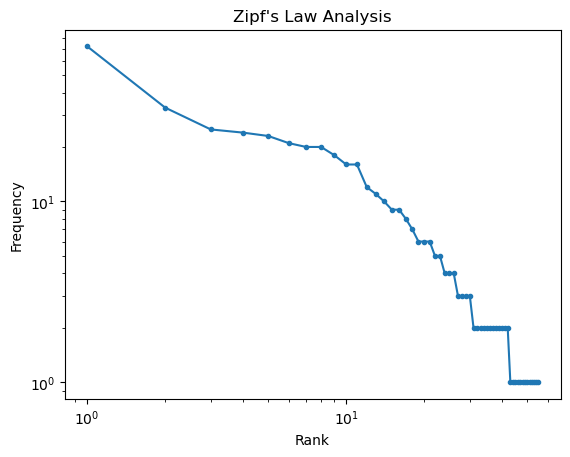

In [8]:
plt.loglog(df['zipfrankfreq'][500][0], df['zipfrankfreq'][500][1], marker='.')
plt.title("Zipf's Law Analysis")
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

# Word2Vec

In [9]:
# Öncelikle Word2Vec modelini eğitin
model = Word2Vec(df['tokenizeddata'], min_count=1)
# Node.js backend'de kullanmak için model kaydı
model.save('word2vec.model')
# Daha sonra her bir kelime listesi için vektörleri hesaplayın
def calculate_word2vec(words):
    vectors = [model.wv[word] for word in words if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

df['word2vec'] = df['tokenizeddata'].apply(calculate_word2vec)

# N-Gram

In [10]:
# Öncelikle CountVectorizer sınıfını tanımlayın
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,3))

# Her bir belge için kelime sayım vektörlerini hesaplayan bir işlev tanımlayın
def calculate_word_counts(words):
    vectors = vectorizer.fit_transform(words)
    return vectors.mean(axis=0)

# Her bir belge için kelime vektörlerini hesaplayın ve bunları yeni bir sütuna ekleyin
df['ngrams'] = df['tokenizeddata'].apply(calculate_word_counts)

# TF-IDF

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Öncelikle TfidfVectorizer sınıfını tanımlayın
vectorizer = TfidfVectorizer(stop_words='english')

# Her bir belge için TF-IDF vektörlerini hesaplayan bir işlev tanımlayın
def calculate_tfidf(words):
    vectors = vectorizer.fit_transform(words)
    return vectors.mean(axis=0)

# Her bir belge için kelime vektörlerini hesaplayın ve bunları yeni bir sütuna ekleyin
df['tfidf'] = df['tokenizeddata'].apply(calculate_tfidf)

# Bag of Words

In [12]:
# BOW için untokenized data kullanılır
data = df['untokenizeddata']

# Daha sonra CountVectorizer eğitilir
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)

# Her bir belge için kelime sayımı vektörleri hesaplanır
df['bow'] = list(X.toarray())

# BERT

In [13]:
# Öncelikle BERT modelini ve tokenizer'ını yükleyin
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Daha sonra her bir kelime listesi için vektörleri hesaplayın
def calculate_bert_embeddings(words):
    input_ids = tokenizer.encode(words, return_tensors='pt')
    with torch.no_grad():
        outputs = model(input_ids)
    last_hidden_state = outputs[0]
    embeddings = torch.mean(last_hidden_state[0], dim=0)
    return embeddings.numpy()

df['bert_embeddings'] = df['tokenizeddata'].apply(calculate_bert_embeddings)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [14]:
df[df["booktitle"] == "The Time Traveler's Wife"]

,booktitle,originalbooktitle,authorname,editionlanguage,ratingscore,ratingvotes,reviewnumber,bookdescription,yearpublished,genres,url,type,untokenizeddata,tokenizeddata,zipfrankfreq,word2vec,ngrams,tfidf,bow,bert_embeddings
3267,The Time Traveler's Wife,The Time Traveler's Wife,Audrey Niffenegger,English,3.98,1604679,47708,"A funny, often poignant tale of boy meets girl...",2003,"{'Fiction': 10259, 'Romance': 5905, 'Fantasy':...",https://www.goodreads.com/book/show/18619684-t...,universe,The Time Traveler's Wife Audrey Niffenegger A ...,"[marri, graviti, henri, past, univer, romanc, ...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...","[-0.0075886226, 0.29164842, 0.05109878, -0.124...",[[[[[0.00925926 0.00925926 0.00925926 0.009259...,[[[[[0.00925926 0.00925926 0.00925926 0.009259...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.04593152, -0.083605245, 0.62203884, -0.5771..."
13657,The Time Traveler's Wife,The Time Traveler's Wife,Audrey Niffenegger,English,3.98,1604511,47705,"A funny, often poignant tale of boy meets girl...",2003,"{'Fiction': 10255, 'Romance': 5903, 'Fantasy':...",https://www.goodreads.com/book/show/18619684-t...,time travel,The Time Traveler's Wife Audrey Niffenegger A ...,"[marri, graviti, henri, past, romanc, stop, pe...","((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...","[-0.03687381, 0.28272313, 0.05479458, -0.13905...",[[[[[0.00934579 0.00934579 0.00934579 0.009345...,[[[[[0.00934579 0.00934579 0.00934579 0.009345...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.050916556, -0.09635576, 0.6106739, -0.56919..."


In [15]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np



# calculate cosine similarity
similarity1 = cosine_similarity(df["word2vec"][3267].reshape(1, -1), df["word2vec"][13657].reshape(1, -1))
similarity2 = cosine_similarity(df["bert_embeddings"][3267].reshape(1, -1), df["bert_embeddings"][13657].reshape(1, -1))
similarity3 = cosine_similarity(df["bow"][3267].reshape(1, -1), df["bow"][13657].reshape(1, -1))

# assuming df["tfidf"][13657] is the matrix with fewer columns
newtfidf = np.hstack((df["tfidf"][13657], np.zeros((1, 1))))
newngram = np.hstack((df["ngrams"][13657], np.zeros((1, 1))))
# now new_matrix and df["tfidf"][3267] should have the same shape

similarity4 = cosine_similarity(np.asarray(df["tfidf"][3267]).reshape(1, -1), np.asarray(newtfidf).reshape(1, -1))
similarity5 = cosine_similarity(np.asarray(df["ngrams"][3267]).reshape(1, -1), np.asarray(newngram).reshape(1, -1))

# print similarity percentage
print(f"Cosine similarity for word2vec: {similarity1[0][0] * 100:.2f}%")
print(f"Cosine similarity for bert: {similarity2[0][0] * 100:.2f}%")
print(f"Cosine similarity for bow: {similarity3[0][0] * 100:.2f}%")
print(f"Cosine similarity for tfidf: {similarity4[0][0] * 100:.2f}% needs to fill with zeros")
print(f"Cosine similarity for ngrams: {similarity5[0][0] * 100:.2f}% needs to fill with zeros")

Cosine similarity for word2vec: 99.90%
Cosine similarity for bert: 99.98%
Cosine similarity for bow: 99.22%
Cosine similarity for tfidf: 99.50% needs to fill with zeros
Cosine similarity for ngrams: 99.50% needs to fill with zeros


In [16]:
df.to_csv("vectorizedData.csv", index=False)